In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


train_image_data = pd.read_csv('features.csv')
print(train_image_data.size)

# Load the metadata file and concatenate it with the image data by id

metadata = pd.read_csv('train.csv')

# concatenate the metadata with the image data by Id collumn, drop the Pawpularity column from the metadata
train_data = pd.merge(train_image_data, metadata.drop('Pawpularity', axis=1), on='Id', how='outer')
train_data.head()


446040


,Id,gabor_mean,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,...,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0007de18844b0dbbb5e1f607da0606e0,41.231567,0.000157,1278.492804,0.690157,2060.880358,0.062406,298.598931,6965.028630,8.182493,...,1,1,0,0,1,0,0,0,0,0
1,0009c66b9439883ba2750fb825e1d7db,23.987915,0.000773,457.965407,0.925960,3091.327100,0.281047,191.414256,11907.342991,8.376357,...,1,0,0,0,0,0,0,0,0,0
2,0013fd999caf9a3efe1352ca1b0d937e,24.436279,0.000233,724.338070,0.891415,3337.386293,0.116865,233.633501,12625.207100,8.503799,...,1,1,0,0,0,0,1,1,0,0
3,0018df346ac9c1d8413cfcc888ca8246,26.991699,0.000493,598.241637,0.880039,2493.181218,0.201182,313.177373,9374.483237,8.374829,...,1,1,0,0,0,0,0,0,0,0
4,001dc955e10590d3ca4673f034feeef2,39.300049,0.000133,1450.048193,0.750709,2908.689995,0.067109,258.257568,10184.711786,8.591187,...,0,1,0,0,1,0,0,0,0,0


In [2]:
train_data.columns

Index(['Id', 'gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2',
       'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7',
       'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12',
       'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green',
       'mean_blue', 'variance_red', 'variance_green', 'variance_blue',
       'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31',
       'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35',
       'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19',
       'Pawpularity', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action',
       'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

In [3]:
X = train_data.drop('Id', axis=1).drop('Pawpularity', axis=1) #except the last and the first(Id)
y = train_data['Pawpularity']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train
X_val = X_val

# Print the shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (7929, 55)
y_train shape: (7929,)
X_val shape: (1983, 55)
y_val shape: (1983,)


C:\Users\HP\AppData\Local\Temp\ipykernel_18936\4022925016.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


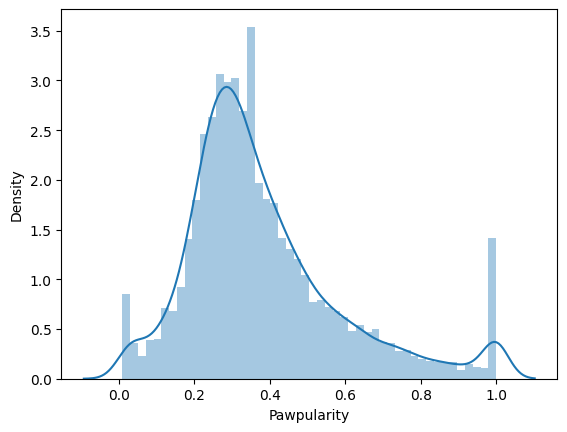

Total number of outliers:  221


C:\Users\HP\AppData\Local\Temp\ipykernel_18936\4022925016.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(of_y_train)


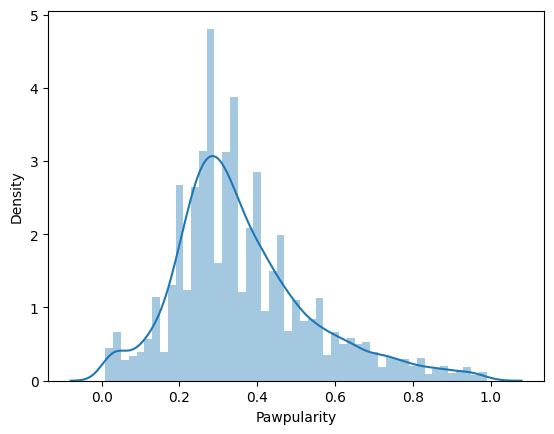

Mean before outlier removal: 0.38036196241644593
Standard deviation before outlier removal: 0.2048104984883986
Mean after outlier removal: 0.3625960041515309
Standard deviation after outlier removal: 0.17839826539114023


In [4]:
# Remove the outliers from the training set

# Plot the target variable distribution
sns.distplot(y_train)
plt.show()

# Identify the outliers
outliers = [x for x in y_train if x >= 1]
print("Total number of outliers: ", len(outliers))

# Remove the outliers from the features
of_X_train = X_train[y_train < 1]

# Remove the outliers
of_y_train = y_train[y_train < 1]

# Plot the target distribution again to see if the outliers have been removed
sns.distplot(of_y_train)
plt.show()

# Print statistics before and after removing the outliers
print("Mean before outlier removal:", np.mean(y_train))
print("Standard deviation before outlier removal:", np.std(y_train))
print("Mean after outlier removal:", np.mean(of_y_train))
print("Standard deviation after outlier removal:", np.std(of_y_train))

# Linear Regression

In [48]:
## Using the whole training data
from sklearn.feature_selection import RFE

ftrs_lr = []
rmse_list_lr = []
r2_list_lr = []

for i in range(1, len(X_train.columns) + 1):
    # Create the RFE with a LinearRegression estimator and n_features_to_select = i
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)

    # Fit the eliminator to the data
    rfe.fit(X_train, y_train)

    # Selected features' names
    print(X_train.columns[rfe.support_])


    # Train the model
    model = LinearRegression()
    x_rfe=rfe.fit_transform(X_train, y_train)
    #get the selected features
    selected_features = X_train.columns[rfe.support_]
    model.fit(X_train[selected_features], y_train)

    # Make predictions
    y_pred = model.predict(X_val[selected_features])

    rmse_list_lr.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    r2_list_lr.append(r2_score(y_val, y_pred))

    ftrs_lr.append(selected_features)


    print(f"Selected Features: {i}")
    # Display the metrics of the best model
    print(f"Selected Features: {selected_features}")
    print(f"Coefficients: {model.coef_}")
    print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
    print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Index(['haralick_3'], dtype='object')
Selected Features: 1
Selected Features: Index(['haralick_3'], dtype='object')
Coefficients: [6.63731244e-07]
Mean squared error: 0.21025
Coefficient of determination: -0.00001
Index(['haralick_3', 'haralick_6'], dtype='object')
Selected Features: 2
Selected Features: Index(['haralick_3', 'haralick_6'], dtype='object')
Coefficients: [-4.69728589e-05  1.24313759e-05]
Mean squared error: 0.20985
Coefficient of determination: 0.00381
Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Selected Features: 3
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Coefficients: [ 1.59909739e+08 -6.39638956e+08  1.59909739e+08]
Mean squared error: 0.20987
Coefficient of determination: 0.00358
Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Selected Features: 4
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Coefficients: [ 1.77687069

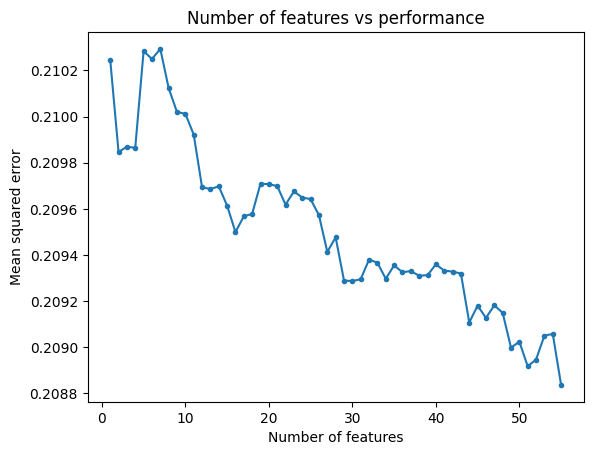

In [49]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(X_train.columns)+1), rmse_list_lr, marker='.')
plt.xlabel('Number of features')
plt.ylabel('Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [51]:
# Get the best performing model and display the results
best_idx = np.argmin(rmse_list_lr)
print(f"Best number of features: {best_idx+1}")
print(f"RMSE of best model: {rmse_list_lr[best_idx]}")
print(f"R2 score of best model: {r2_list_lr[best_idx]}")
print(f"Selected features: {ftrs_lr[best_idx]}")

Best number of features: 55
RMSE of best model: 0.20883651812767404
R2 score of best model: 0.01336740127163305
Selected features: Index(['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3',
       'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8',
       'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation',
       'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue',
       'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49',
       'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30',
       'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36',
       'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes',
       'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human',
       'Occlusion', 'Info', 'Blur'],
      dtype='object')


In [52]:
from sklearn.feature_selection import RFE

ftrs_lr_of = []
rmse_list_lr_of = []
r2_list_lr_of = []

for i in range(1, len(of_X_train.columns) + 1):
    # Create the RFE with a LinearRegression estimator and n_features_to_select = i
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)

    # Fit the eliminator to the data
    rfe.fit(of_X_train, of_y_train)

    # Selected features' names
    print(of_X_train.columns[rfe.support_])


    # Train the model
    model = LinearRegression()
    x_rfe=rfe.fit_transform(of_X_train, of_y_train)
    #get the selected features
    selected_features = of_X_train.columns[rfe.support_]
    model.fit(of_X_train[selected_features], of_y_train)

    # Make predictions
    y_pred = model.predict(X_val[selected_features])

    rmse_list_lr_of.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    r2_list_lr_of.append(r2_score(y_val, y_pred))

    ftrs_lr_of.append(selected_features)


    print(f"Selected Features: {i}")
    # Display the metrics of the best model
    print(f"Selected Features: {selected_features}")
    print(f"Coefficients: {model.coef_}")
    print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
    print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Index(['haralick_3'], dtype='object')
Selected Features: 1
Selected Features: Index(['haralick_3'], dtype='object')
Coefficients: [5.26642977e-07]
Mean squared error: 0.21101
Coefficient of determination: -0.00725
Index(['haralick_3', 'haralick_6'], dtype='object')
Selected Features: 2
Selected Features: Index(['haralick_3', 'haralick_6'], dtype='object')
Coefficients: [-3.57911248e-05  9.47688026e-06]
Mean squared error: 0.21067
Coefficient of determination: -0.00406
Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Selected Features: 3
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Coefficients: [ 1.64981275e+08 -6.59925101e+08  1.64981275e+08]
Mean squared error: 0.21069
Coefficient of determination: -0.00418
Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Selected Features: 4
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Coefficients: [ 1.581180

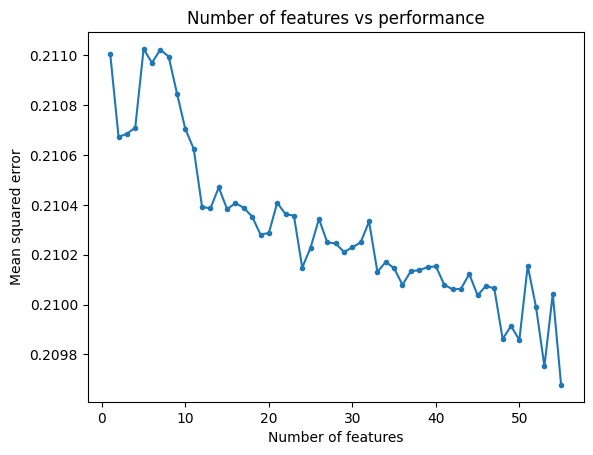

In [53]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(X_train.columns) +1), rmse_list_lr_of, marker='.')
plt.xlabel('Number of features')
plt.ylabel('Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [54]:
# Get the features that give lowest rmse
best = np.argmin(rmse_list_lr_of)
print(f"Best number of features: {best+1}")

Best number of features: 55


# SVR model

In [11]:
# Apply a SVR model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ftrs = []
rmse_list = []
r2_list = []
estimators = []

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}


# Perform grid search on scaled data
svr_model = SVR()
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

# Print the best estimator, parameters and best score
print(f"Best estimator: {best_estimator}")
print(f"Best parameters: {best_params}")
print(f"Best score: {grid.best_score_}")

# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val_scaled)
rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)
estimators.append(best_estimator)

print(f"Selected Features: {i}")
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.025 total time=   7.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.011 total time=   7.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.009 total time=   7.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.016 total time=   7.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.023 total time=   7.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.013 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.004 total time=   1.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.002 total time=   1.2s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.006 total time=   1.3s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.019 total time=   1.2s
[CV 1/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.031 total time=   1.5s
[CV 2/5] END ...C=0.1, gamma=1, kernel=sigmoid;

In [12]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val_scaled)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.20992
Coefficient of determination: 0.00311


In [13]:
# Apply a SVR model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ftrs = []
rmse_list = []
r2_list = []
estimators = []

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(of_X_train)
X_val_scaled = scaler.transform(X_val)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}

# Perform grid search on scaled data
svr_model = SVR()
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, of_y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

# Print the best estimator, parameters and best score
print(f"Best estimator: {best_estimator}")
print(f"Best parameters: {best_params}")
print(f"Best score: {grid.best_score_}")

# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val_scaled)
rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)
estimators.append(best_estimator)

print(f"Selected Features: {i}")
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   6.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.004 total time=   6.9s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.011 total time=   6.8s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   6.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.021 total time=   6.8s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.005 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.008 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.002 total time=   0.9s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.003 total time=   1.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.011 total time=   1.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.013 total time=   1.5s
[CV 2/5] END ...C=0.1, gamma=1, kernel=sigmoid;

In [14]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val_scaled)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21105
Coefficient of determination: -0.00764


# Decision tree Regressor

In [63]:
# Create a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.017 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.017 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_l

({'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=4, min_samples_split=4))

In [64]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Mean squared error: 0.21017
Coefficient of determination: 0.00072


In [65]:
# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(of_X_train, of_y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.010 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.005 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.001 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.010 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_l

({'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 8},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=6, min_samples_split=8))

In [66]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21067
Coefficient of determination: -0.00402


# Random Forest Regressor

In [16]:
## Using the whole training data
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)


print(f"Selected Features: {i}")
# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Selected Features: 55
Mean squared error: 0.21123
Coefficient of determination: -0.00937


In [17]:
## Using the whole training data

# Train the model
model = RandomForestRegressor()
model.fit(of_X_train, of_y_train)

# Make predictions
y_pred = model.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)


print(f"Selected Features: {i}")
# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Selected Features: 55
Mean squared error: 0.21056
Coefficient of determination: -0.00301


# Ridge Regression

In [19]:
# Ridge regression

from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE


# Define the alpha values to test
alphas = [0.01, 0.1, 1, 10, 100, 1000]

# Define the number of features to select
num_features_range = range(1, len(X_train.columns) + 1)

# Create a dictionary to store the results
results = {'alpha': [], 'num_features': [], 'rmse': [], 'r2': [], 'features_selected': [], 'coefficients': []}

# Loop to iterate over alpha values and number of features
for alpha in alphas:
    for num_features in num_features_range:
        # Perform Recursive Feature Elimination (RFE)
        rfe = RFE(Ridge(alpha=alpha), n_features_to_select=num_features)
        x_rfe = rfe.fit_transform(X_train, y_train)
        
        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_rfe, y_train)

        # Make predictions on the test set
        x_test_rfe = rfe.transform(X_val)
        y_pred = ridge_model.predict(x_test_rfe)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        # Store results in the dictionary
        results['alpha'].append(alpha)
        results['num_features'].append(num_features)
        results['rmse'].append(rmse)
        results['r2'].append(r2)
        results['features_selected'].append(list(X_train.columns[rfe.support_]))
        results['coefficients'].append(ridge_model.coef_)

        # Print results for each combination of features
        print(f"\nAlpha: {alpha}, Num Features: {num_features}")
        print(f"Features Selected: {list(X_train.columns[rfe.support_])}")
        print(f"RMSE: {rmse}")
        print(f"R^2: {r2}")        



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 1
Features Selected: ['haralick_12']
RMSE: 0.21055190025796938
R^2: -0.0029075571519412424


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 2
Features Selected: ['haralick_12', 'hog_90']
RMSE: 0.2103557856911426
R^2: -0.001040148862144763


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 3
Features Selected: ['haralick_12', 'hog_27', 'hog_90']
RMSE: 0.21017434510317914
R^2: 0.0006859836631001315


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 4
Features Selected: ['haralick_12', 'hog_27', 'hog_103', 'hog_90']
RMSE: 0.21017187439641255
R^2: 0.0007094784182629654


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 5
Features Selected: ['haralick_12', 'hog_27', 'hog_103', 'hog_90', 'hog_50']
RMSE: 0.20995228750338088
R^2: 0.002796498587336993


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 6
Features Selected: ['haralick_12', 'hog_95', 'hog_27', 'hog_103', 'hog_90', 'hog_50']
RMSE: 0.20977118796079078
R^2: 0.0045160817611925586


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 7
Features Selected: ['haralick_12', 'hog_95', 'hog_27', 'hog_103', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20977402539266382
R^2: 0.004489151114238532


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 8
Features Selected: ['haralick_12', 'hog_95', 'hog_27', 'hog_88', 'hog_103', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20980654633886747
R^2: 0.004180462140748964

Alpha: 0.01, Num Features: 9
Features Selected: ['haralick_12', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.2096592960198688
R^2: 0.005577780672659793


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 10
Features Selected: ['haralick_9', 'haralick_12', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20965939100655645
R^2: 0.005576879621326136


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 11
Features Selected: ['haralick_9', 'haralick_12', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20962649415790838
R^2: 0.005888917353195411


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 12
Features Selected: ['haralick_9', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20937608768302107
R^2: 0.008262502560293927


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 13
Features Selected: ['haralick_4', 'haralick_9', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20943404619364886
R^2: 0.007713370283130683

Alpha: 0.01, Num Features: 14
Features Selected: ['haralick_4', 'haralick_7', 'haralick_9', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20946983580909392
R^2: 0.007374202970633292


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 15
Features Selected: ['haralick_4', 'haralick_7', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20946826183542702
R^2: 0.007389120259222115


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 16
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.209470968051468
R^2: 0.007363472107908775


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 17
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92', 'Collage']
RMSE: 0.20949339077316578
R^2: 0.007150948109028277

Alpha: 0.01, Num Features: 18
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92', 'Collage']
RMSE: 0.20948697842644184
R^2: 0.007211727066362639


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 19
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92', 'hog_159', 'Collage']
RMSE: 0.20948136774299844
R^2: 0.007264905991125059

Alpha: 0.01, Num Features: 20
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage']
RMSE: 0.20955091733843711
R^2: 0.006605603576199326


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 21
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage']
RMSE: 0.20952605279734543
R^2: 0.006841334640331209


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 22
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage']
RMSE: 0.20944751617089163
R^2: 0.007585726202424259


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 23
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage', 'Blur']
RMSE: 0.20928473355703975
R^2: 0.009127735532420744

Alpha: 0.01, Num Features: 24
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage', 'Blur']
RMSE: 0.2092909096492325
R^2: 0.009069252444328213


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 25
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage', 'Blur']
RMSE: 0.209385716534169
R^2: 0.008171283812019148

Alpha: 0.01, Num Features: 26
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Face', 'Collage', 'Blur']
RMSE: 0.20942345948317892
R^2: 0.007813686214874327


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 27
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.20925027021336678
R^2: 0.009454046574149388

Alpha: 0.01, Num Features: 28
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.20921364765729786
R^2: 0.009800742902684512


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 29
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.20921896384112165
R^2: 0.009750419721449965

Alpha: 0.01, Num Features: 30
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Group', 'Collage', 'Blur']
RMSE: 0.2091729230456087
R^2: 0.010186201078105084


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 31
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Group', 'Collage', 'Blur']
RMSE: 0.20916854987734745
R^2: 0.0102275886246177

Alpha: 0.01, Num Features: 32
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.209208723784723
R^2: 0.009847351311324304


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 33
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.20920612542167868
R^2: 0.009871946462302272

Alpha: 0.01, Num Features: 34
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.20918051417282496
R^2: 0.010114356800166036


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 35
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Human', 'Blur']
RMSE: 0.20923270132959793
R^2: 0.009620374255610686

Alpha: 0.01, Num Features: 36
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20920500571328088
R^2: 0.009882545116881358


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 37
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20921514470319175
R^2: 0.009786571943454891

Alpha: 0.01, Num Features: 38
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMS

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 39
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20920748337899045
R^2: 0.009859092574865502

Alpha: 0.01, Num Features: 40
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 41
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.209210665618451
R^2: 0.009828970426460248

Alpha: 0.01, Num Features: 42
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Acti

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 44
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20914098377840945
R^2: 0.01048845352384542

Alpha: 0.01, Num Features: 45
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 47
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20889157201540443
R^2: 0.012847136707642148

Alpha: 0.01, Num Features: 48
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 50
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20877977333218764
R^2: 0.013903501559822451

Alpha: 0.01, Num Features: 51
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_green',

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.4029e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a


Alpha: 0.1, Num Features: 1
Features Selected: ['haralick_11']
RMSE: 0.21016949343020708
R^2: 0.0007321195398798386


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 2
Features Selected: ['haralick_11', 'hog_90']
RMSE: 0.2099807910452743
R^2: 0.0025257155293871847


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 3
Features Selected: ['haralick_4', 'haralick_11', 'hog_90']
RMSE: 0.2101757680100127
R^2: 0.0006724526533536945


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 4
Features Selected: ['haralick_4', 'haralick_11', 'hog_27', 'hog_90']
RMSE: 0.21003912262960323
R^2: 0.0019714520970574023


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 5
Features Selected: ['haralick_4', 'haralick_11', 'hog_27', 'hog_103', 'hog_90']
RMSE: 0.21005849208958804
R^2: 0.001787370530449084

Alpha: 0.1, Num Features: 6
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_90']
RMSE: 0.21006621074121504
R^2: 0.0017140100391087598


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 7
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_90', 'hog_50']
RMSE: 0.20987898048260825
R^2: 0.0034927449249934073

Alpha: 0.1, Num Features: 8
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_95', 'hog_27', 'hog_103', 'hog_90', 'hog_50']
RMSE: 0.20971372518310688
R^2: 0.0050613943636556025


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 9
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_95', 'hog_27', 'hog_103', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20971396160834468
R^2: 0.005059151031905573

Alpha: 0.1, Num Features: 10
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_95', 'hog_27', 'hog_88', 'hog_103', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.2097430578307727
R^2: 0.004783050878622408


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 11
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.2096189240977569
R^2: 0.0059607150030348555


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 12
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.209587426075654
R^2: 0.006259427718149246

Alpha: 0.1, Num Features: 13
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20939017225005208
R^2: 0.008129071247967912


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 14
Features Selected: ['haralick_4', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20947644925797831
R^2: 0.007311522980688823

Alpha: 0.1, Num Features: 15
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92']
RMSE: 0.20945204284348534
R^2: 0.00754282874417711


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 16
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92', 'Collage']
RMSE: 0.209477057521895
R^2: 0.007305757965481829

Alpha: 0.1, Num Features: 17
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_92', 'hog_159', 'Collage']
RMSE: 0.20947274851116937
R^2: 0.007346597627750473


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 18
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage']
RMSE: 0.20954736517909495
R^2: 0.00663928193296881

Alpha: 0.1, Num Features: 19
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage']
RMSE: 0.20952741977142098
R^2: 0.006828375616296012


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 20
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage']
RMSE: 0.2094510531763536
R^2: 0.007552207501321351

Alpha: 0.1, Num Features: 21
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage', 'Blur']
RMSE: 0.20928583003856246
R^2: 0.009117352778198584


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 22
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage', 'Blur']
RMSE: 0.2092928424446944
R^2: 0.00905094992656641

Alpha: 0.1, Num Features: 23
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Collage', 'Blur']
RMSE: 0.2093888809782554
R^2: 0.008141304592000465


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 24
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Face', 'Collage', 'Blur']
RMSE: 0.20942587025611867
R^2: 0.007790843027298711


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 25
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.2092507423817616
R^2: 0.009449576281040262


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 26
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.20920305616147625
R^2: 0.009900998559430163

Alpha: 0.1, Num Features: 27
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.20920922897863786
R^2: 0.009842569295662296


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 28
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Group', 'Collage', 'Blur']
RMSE: 0.2091704124719451
R^2: 0.010209961185353444

Alpha: 0.1, Num Features: 29
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Group', 'Collage', 'Blur']
RMSE: 0.2091666124820766
R^2: 0.010245923804638402


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 30
Features Selected: ['haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.2092072973860198
R^2: 0.009860853115778112


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 31
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.2092050145017498
R^2: 0.009882461929419994

Alpha: 0.1, Num Features: 32
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.20917913882033612
R^2: 0.010127373664692962


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 33
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.20917887295189938
R^2: 0.010129889935884928

Alpha: 0.1, Num Features: 34
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Human', 'Blur']
RMSE: 0.2092302363398639
R^2: 0.009643709625409613


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 35
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20920452793580954
R^2: 0.009887067525626958

Alpha: 0.1, Num Features: 36
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20918487661279753
R^2: 0.010073068425440646


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 37
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20919441833755573
R^2: 0.00998275763538714

Alpha: 0.1, Num Features: 38
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 39
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2092069055421672
R^2: 0.009864562160151191

Alpha: 0.1, Num Features: 40
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'C

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 41
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20920810076819674
R^2: 0.009853248584955954

Alpha: 0.1, Num Features: 42
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Acti

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 43
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20914241612550233
R^2: 0.010474899711342744

Alpha: 0.1, Num Features: 44
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_1

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 45
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20896236922339137
R^2: 0.012177894679226475

Alpha: 0.1, Num Features: 46
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 48
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20879441827988157
R^2: 0.013765156375257437

Alpha: 0.1, Num Features: 49
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40502e-17): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.1, Num Features: 52
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20880531352196915
R^2: 0.013662226921318577

Alpha: 0.1, Num Features: 53
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'm

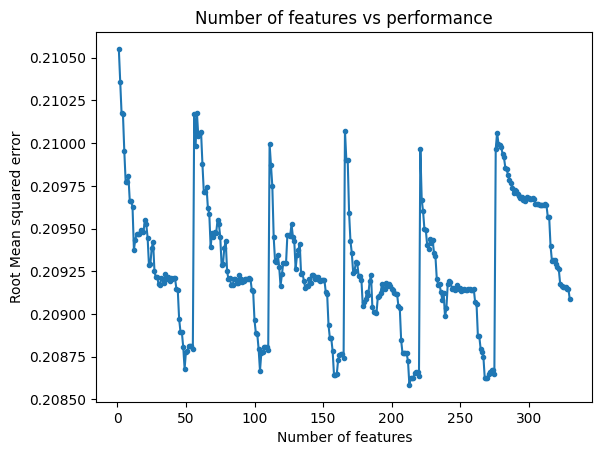

In [29]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(results['rmse']) +1), results['rmse'][:], marker='.')
plt.xlabel('Number of features')
plt.ylabel('Root Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [30]:
# Print the results of the best model
best_model_idx = np.argmin(results['rmse'])
print(f"N features: {results['num_features'][best_model_idx]}")
print(f"Best model: {results['features_selected'][best_model_idx]}")
print(f"Best rmse: {results['rmse'][best_model_idx]}")
print(f"Best r2: {results['r2'][best_model_idx]}")

N features: 48
Best model: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'variance_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
Best rmse: 0.2085842221303282
Best r2: 0.01574986862140204


In [33]:
# Ridge regression

from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE


# Define the alpha values to test
alphas = [0.01, 0.1, 1, 10, 100, 1000]

# Define the number of features to select
num_features_range = range(1, len(X_train.columns) + 1)

# Create a dictionary to store the results
results_ridge_of = {'alpha': [], 'num_features': [], 'rmse': [], 'r2': [], 'features_selected': [], 'coefficients': []}

# Loop to iterate over alpha values and number of features
for alpha in alphas:
    for num_features in num_features_range:
        # Perform Recursive Feature Elimination (RFE)
        rfe = RFE(Ridge(alpha=alpha), n_features_to_select=num_features)
        x_rfe = rfe.fit_transform(of_X_train, of_y_train)
        
        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_rfe, of_y_train)

        # Make predictions on the test set
        x_test_rfe = rfe.transform(X_val)
        y_pred = ridge_model.predict(x_test_rfe)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        # Store results in the dictionary
        results_ridge_of['alpha'].append(alpha)
        results_ridge_of['num_features'].append(num_features)
        results_ridge_of['rmse'].append(rmse)
        results_ridge_of['r2'].append(r2)
        results_ridge_of['features_selected'].append(list(of_X_train.columns[rfe.support_]))
        results_ridge_of['coefficients'].append(ridge_model.coef_)

        # Print results for each combination of features
        print(f"\nAlpha: {alpha}, Num Features: {num_features}")
        print(f"Features Selected: {list(of_X_train.columns[rfe.support_])}")
        print(f"RMSE: {rmse}")
        print(f"R^2: {r2}")        



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 1
Features Selected: ['haralick_12']
RMSE: 0.21122102614061855
R^2: -0.009292089641975698

Alpha: 0.01, Num Features: 2
Features Selected: ['haralick_9', 'haralick_12']
RMSE: 0.21121960819453509
R^2: -0.009278538747085063


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 3
Features Selected: ['haralick_9', 'haralick_12', 'hog_90']
RMSE: 0.21102380721016745
R^2: -0.007408199747149791


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 4
Features Selected: ['haralick_9', 'haralick_12', 'hog_103', 'hog_90']
RMSE: 0.21097975678850248
R^2: -0.00698765834156867


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 5
Features Selected: ['haralick_0', 'haralick_9', 'haralick_12', 'hog_103', 'hog_90']
RMSE: 0.2109927167697174
R^2: -0.007111375822014709


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 6
Features Selected: ['haralick_0', 'haralick_9', 'haralick_12', 'hog_103', 'hog_90', 'hog_50']
RMSE: 0.21075757590191205
R^2: -0.004867875777617492


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 7
Features Selected: ['haralick_0', 'haralick_9', 'haralick_12', 'hog_103', 'hog_100', 'hog_90', 'hog_50']
RMSE: 0.21072684433859123
R^2: -0.00457484802611674


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 8
Features Selected: ['haralick_0', 'haralick_9', 'haralick_12', 'hog_103', 'hog_100', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2107219253095177
R^2: -0.004527948683757055

Alpha: 0.01, Num Features: 9
Features Selected: ['haralick_0', 'haralick_9', 'haralick_12', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21074393741159536
R^2: -0.004737826479970009


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 10
Features Selected: ['haralick_0', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21068193956357187
R^2: -0.004146754478670633


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 11
Features Selected: ['haralick_0', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50']
RMSE: 0.21058210599046337
R^2: -0.003195331618038866

Alpha: 0.01, Num Features: 12
Features Selected: ['haralick_0', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21062888280169684
R^2: -0.0036410626579768124


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 13
Features Selected: ['haralick_0', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21062884565368556
R^2: -0.003640708639423007

Alpha: 0.01, Num Features: 14
Features Selected: ['haralick_0', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21053356051445915
R^2: -0.0027328518532225843


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 15
Features Selected: ['haralick_0', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_88', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21047991376330255
R^2: -0.0022218976279986258

Alpha: 0.01, Num Features: 16
Features Selected: ['haralick_0', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_88', 'hog_103', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21038751404503186
R^2: -0.0013421491262048946

Alpha: 0.01, Num Features: 17
Features Selected: ['haralick_0', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.2104074444200571
R^2: -0.0015318758781728281


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 18
Features Selected: ['haralick_0', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21042412180918005
R^2: -0.0016906497163906575

Alpha: 0.01, Num Features: 19
Features Selected: ['haralick_0', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21037972719918333
R^2: -0.0012680273068008674


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 20
Features Selected: ['haralick_0', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159']
RMSE: 0.21035920099827
R^2: -0.0010726546218322586

Alpha: 0.01, Num Features: 21
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159']
RMSE: 0.2104246995192542
R^2: -0.001696149918258394


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 22
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159']
RMSE: 0.21038569728933543
R^2: -0.0013248554554547987

Alpha: 0.01, Num Features: 23
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Blur']
RMSE: 0.21020509290676598
R^2: 0.0003935696799534094


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 24
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Blur']
RMSE: 0.21004611736567502
R^2: 0.0019049781712737746

Alpha: 0.01, Num Features: 25
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Group', 'Blur']
RMSE: 0.20996769807750076
R^2: 0.0026501030167710438


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 26
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Accessory', 'Group', 'Blur']
RMSE: 0.21008094659345478
R^2: 0.0015739483818528743

Alpha: 0.01, Num Features: 27
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Accessory', 'Group', 'Blur']
RMSE: 0.21010024796446822
R^2: 0.001390477417599456


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 28
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.2100877660370252
R^2: 0.001509127456990167

Alpha: 0.01, Num Features: 29
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.21013235442786155
R^2: 0.001085249126297927


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 30
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.20996129595437693
R^2: 0.0027109224623486083

Alpha: 0.01, Num Features: 31
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.20998951372196734
R^2: 0.0024428429355305425


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 32
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Blur']
RMSE: 0.2100374665359803
R^2: 0.0019871903288397608

Alpha: 0.01, Num Features: 33
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21001556490189133
R^2: 0.002195314832604822


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 34
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20998843676818987
R^2: 0.0024530750673603663

Alpha: 0.01, Num Features: 35
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20998855947005576
R^2: 0.0024519092802661735


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 36
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20997999450299032
R^2: 0.0025332831638725795

Alpha: 0.01, Num Features: 37
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2099796566965831
R^2: 0.0

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 38
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20997227602662738
R^2: 0.002606611880694776

Alpha: 0.01, Num Features: 39
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'B

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 40
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20996112136025702
R^2: 0.0027125810607639966

Alpha: 0.01, Num Features: 41
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessor

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 43
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20994605782084286
R^2: 0.002855675547480896

Alpha: 0.01, Num Features: 44
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 46
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20976254053041157
R^2: 0.004598154046981717

Alpha: 0.01, Num Features: 47
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_4

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 49
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20956093719595367
R^2: 0.006510601288373663

Alpha: 0.01, Num Features: 50
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_green', 'hog_95', 'hog_49', 'hog_27

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.01, Num Features: 54
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20964601141799916
R^2: 0.00570379544994426

Alpha: 0.01, Num Features: 55
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturat

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.62757e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 1
Features Selected: ['haralick_12']
RMSE: 0.21111440469748186
R^2: -0.008273393534467433


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 2
Features Selected: ['haralick_0', 'haralick_12']
RMSE: 0.2111318693051853
R^2: -0.008440220877817595

Alpha: 0.1, Num Features: 3
Features Selected: ['haralick_0', 'haralick_11', 'haralick_12']
RMSE: 0.21100034736294737
R^2: -0.0071842219024487175


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 4
Features Selected: ['haralick_0', 'haralick_11', 'haralick_12', 'hog_90']
RMSE: 0.2108078009578714
R^2: -0.005346867421981427


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 5
Features Selected: ['haralick_0', 'haralick_11', 'haralick_12', 'hog_103', 'hog_90']
RMSE: 0.2107872135928975
R^2: -0.005150513851184257


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 6
Features Selected: ['haralick_0', 'haralick_11', 'haralick_12', 'hog_103', 'hog_90', 'hog_50']
RMSE: 0.210567945509005
R^2: -0.0030604174837411957


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 7
Features Selected: ['haralick_0', 'haralick_11', 'haralick_12', 'hog_103', 'hog_100', 'hog_90', 'hog_50']
RMSE: 0.21054843544854035
R^2: -0.0028745500409614877


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 8
Features Selected: ['haralick_0', 'haralick_11', 'haralick_12', 'hog_103', 'hog_100', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21054500507237428
R^2: -0.002841871489619896

Alpha: 0.1, Num Features: 9
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_103', 'hog_100', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21058422613074051
R^2: -0.0032155320574380752


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 10
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21064681242402233
R^2: -0.003811938284013383

Alpha: 0.1, Num Features: 11
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50']
RMSE: 0.21054902992613678
R^2: -0.0028802132252299106


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 12
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21059778498905646
R^2: -0.003344724024179735


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 13
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_49', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21050419306129162
R^2: -0.0024531277450567934


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 14
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_49', 'hog_88', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21045033698767276
R^2: -0.0019402516602078368

Alpha: 0.1, Num Features: 15
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.2104294303961823
R^2: -0.0017411917264364973


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 16
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21046408861621743
R^2: -0.002071197141461978

Alpha: 0.1, Num Features: 17
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.2103985435045209
R^2: -0.0014471415941612609


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 18
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36']
RMSE: 0.21035412956342966
R^2: -0.0010243865782528783

Alpha: 0.1, Num Features: 19
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159']
RMSE: 0.21033283163050015
R^2: -0.000821693424574832


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 20
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Blur']
RMSE: 0.21014941671204052
R^2: 0.0009230231867985994

Alpha: 0.1, Num Features: 21
Features Selected: ['haralick_0', 'haralick_4', 'haralick_8', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Blur']
RMSE: 0.21023290106705858
R^2: 0.00012907509407278361

Alpha: 0.1, Num Features: 22
Features Selected: ['haralick_0', 'haralick_4', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Blur']
RMSE: 0.21005726156149368
R^2: 0.0017990656

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 23
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Blur']
RMSE: 0.21002567892574572
R^2: 0.002099207066537767

Alpha: 0.1, Num Features: 24
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Group', 'Blur']
RMSE: 0.20995388185768155
R^2: 0.002781353225057348


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 25
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'Accessory', 'Group', 'Blur']
RMSE: 0.2100691957527309
R^2: 0.0016856388285501067

Alpha: 0.1, Num Features: 26
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Accessory', 'Group', 'Blur']
RMSE: 0.21008812387114245
R^2: 0.0015057260746915713


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 27
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.21008004250281603
R^2: 0.0015825418856335594

Alpha: 0.1, Num Features: 28
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.21012522857473578
R^2: 0.0011529968953368774


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 29
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.20995344564401267
R^2: 0.0027854969917630035

Alpha: 0.1, Num Features: 30
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Blur']
RMSE: 0.20998191555892845
R^2: 0.002515031919230304


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 31
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Blur']
RMSE: 0.2100284020388011
R^2: 0.00207333009465982

Alpha: 0.1, Num Features: 32
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21000766579857688
R^2: 0.0022703722606108867


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 33
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20997798415715993
R^2: 0.002552382540084608

Alpha: 0.1, Num Features: 34
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2099786122096086
R^2: 0.0025464157206780413


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 35
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20996966644875392
R^2: 0.0026314033397589753

Alpha: 0.1, Num Features: 36
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2099695997435671
R^2: 0.002632037046990332


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 37
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2099616532926376
R^2: 0.002707527838153645

Alpha: 0.1, Num Features: 38
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2099616585001

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 39
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.20996403978980221
R^2: 0.002684856563223814

Alpha: 0.1, Num Features: 40
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 41
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2099374603519323
R^2: 0.0029373416848084144

Alpha: 0.1, Num Features: 42
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Acti

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 44
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20992350525377665
R^2: 0.0030698920623069004

Alpha: 0.1, Num Features: 45
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 47
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20974239325597394
R^2: 0.004789357595638033

Alpha: 0.1, Num Features: 48
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'h

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.1, Num Features: 51
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.20960791652732635
R^2: 0.006065110826968811

Alpha: 0.1, Num Features: 52
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'vari

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.61955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 1, Num Features: 1
Features Selected: ['hog_90']
RMSE: 0.21082314837053318
R^2: -0.005493257022625819

Alpha: 1, Num Features: 2
Features Selected: ['hog_103', 'hog_90']
RMSE: 0.21079028551575102
R^2: -0.005179811333529738

Alpha: 1, Num Features: 3
Features Selected: ['hog_49', 'hog_103', 'hog_90']
RMSE: 0.21044378479415307
R^2: -0.0018778635042029368

Alpha: 1, Num Features: 4
Features Selected: ['hog_49', 'hog_103', 'hog_31', 'hog_90']
RMSE: 0.21050845294043247
R^2: -0.0024937005461476147

Alpha: 1, Num Features: 5
Features Selected: ['hog_49', 'hog_103', 'hog_31', 'hog_100', 'hog_90']
RMSE: 0.21049303094002964
R^2: -0.00234681911012391

Alpha: 1, Num Features: 6
Features Selected: ['hog_49', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99']
RMSE: 0.21049353608210727
R^2: -0.0023516299882797576

Alpha: 1, Num Features: 7
Features Selected: ['hog_49', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21042639271864716
R^2: -0.0017122704415681866

Alpha: 

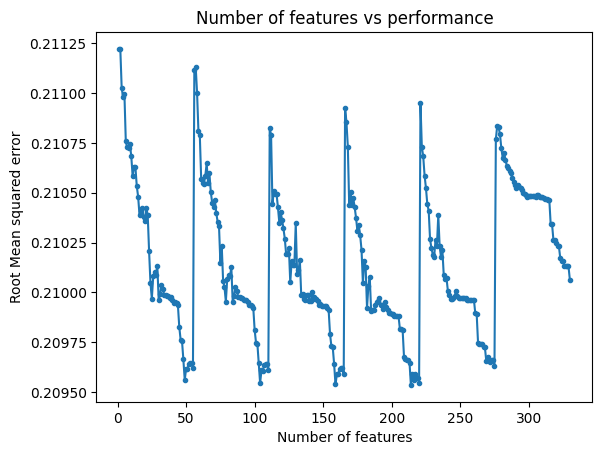

In [34]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(results_ridge_of['rmse']) +1), results_ridge_of['rmse'][:], marker='.')
plt.xlabel('Number of features')
plt.ylabel('Root Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [35]:
# Print the results of the best model
best_model_idx = np.argmin(results_ridge_of['rmse'])
print(f"N features: {results_ridge_of['num_features'][best_model_idx]}")
print(f"Best model: {results_ridge_of['features_selected'][best_model_idx]}")
print(f"Best rmse: {results_ridge_of['rmse'][best_model_idx]}")
print(f"Best r2: {results_ridge_of['r2'][best_model_idx]}")

N features: 49
Best model: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
Best rmse: 0.2095355881116013
Best r2: 0.006750937333261486


# Test all the best Models in the test set

In [41]:
# Get the test data

test_data = pd.read_csv('test_features.csv')

metadata = pd.read_csv('test0.csv')

# concatenate the metadata with the image data by Id collumn, drop the Pawpularity column from the metadata
test_data = pd.merge(test_data, metadata, on='Id', how='outer')

X_test = test_data.drop('Id', axis=1).drop('Pawpularity', axis=1) 
y_test = test_data['Pawpularity']


In [44]:
# Get all the best performing models and test them on the test set
# Add the metrics of each model to a dataframe

####################
# Linear Regression
# Normal
# Get the best performing model and display the results
best_idx_lr = np.argmin(rmse_list_lr)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train[ftrs_lr[best_idx_lr]], y_train)
y_pred = lin_reg_model.predict(X_test[ftrs_lr[best_idx_lr]])
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lin_reg_r2 = r2_score(y_test, y_pred)

# Outlier Free
best_idx_lr_of = np.argmin(rmse_list_lr_of)
lin_reg_of_model = LinearRegression()
lin_reg_of_model.fit(of_X_train[ftrs_lr[best_idx_lr]], of_y_train)
y_pred = lin_reg_of_model.predict(X_test[ftrs_lr[best_idx_lr]])
lin_reg_of_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lin_reg_of_r2 = r2_score(y_test, y_pred)


####################
# SVR
# Normal

# Outlier Free

####################
# Decision Tree
# Normal

# Outlier Free

####################
# Random Forest
# Normal

# Outlier Free

####################
# Ridge Regression
# Normal
ridge_best_idx = np.argmin(results['rmse'])
ridge_of_model = Ridge(alpha=results['alpha'][ridge_best_idx])
ridge_of_model.fit(of_X_train[results['features_selected'][ridge_best_idx]], of_y_train)
y_pred = ridge_of_model.predict(X_test[results['features_selected'][ridge_best_idx]])
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_r2 = r2_score(y_test, y_pred)

# Outlier Free
# Print the results of the best model
ridge_of_best_idx = np.argmin(results_ridge_of['rmse'])
ridge_of_model = Ridge(alpha=results_ridge_of['alpha'][ridge_of_best_idx])
ridge_of_model.fit(of_X_train[results_ridge_of['features_selected'][ridge_of_best_idx]], of_y_train)
y_pred = ridge_of_model.predict(X_test[results_ridge_of['features_selected'][ridge_of_best_idx]])
ridge_of_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_of_r2 = r2_score(y_test, y_pred)

# Create a dataframe to store the results
results_df = pd.DataFrame(columns=['model', 'rmse', 'r2'])